# Underfitting and Overfitting of the models

Now that you have a reliable way to measure model accuracy, you can experiment with alternative models and see which gives the best predictions. But what alternatives do you have for models?

You can see in scikit-learn's documentation that the decision tree model has many options (more than you'll want or need for a long time). The most important options determine the tree's depth. 


In practice, it's not uncommon for a tree to have 10 splits between the top level (all houses) and a leaf. As the tree gets deeper, the dataset gets sliced up into leaves with fewer houses. If a tree only had 1 split, it divides the data into 2 groups. If each group is split again, we would get 4 groups of houses. Splitting each of those again would create 8 groups. If we keep doubling the number of groups by adding more splits at each level, we'll have 210 groups of houses by the time we get to the 10th level. That's 1024 leaves.

When we divide the houses amongst many leaves, we also have fewer houses in each leaf. Leaves with very few houses will make predictions that are quite close to those homes' actual values, but they may make very unreliable predictions for new data (because each prediction is based on only a few houses)

This is a phenomenon called overfitting, where a model matches the training data almost perfectly, but does poorly in validation and other new data. On the flip side, if we make our tree very shallow, it doesn't divide up the houses into very distinct groups.

At an extreme, if a tree divides houses into only 2 or 4, each group still has a wide variety of houses. Resulting predictions may be far off for most houses, even in the training data (and it will be bad in validation too for the same reason). When a model fails to capture important distinctions and patterns in the data, so it performs poorly even in training data, that is called underfittin

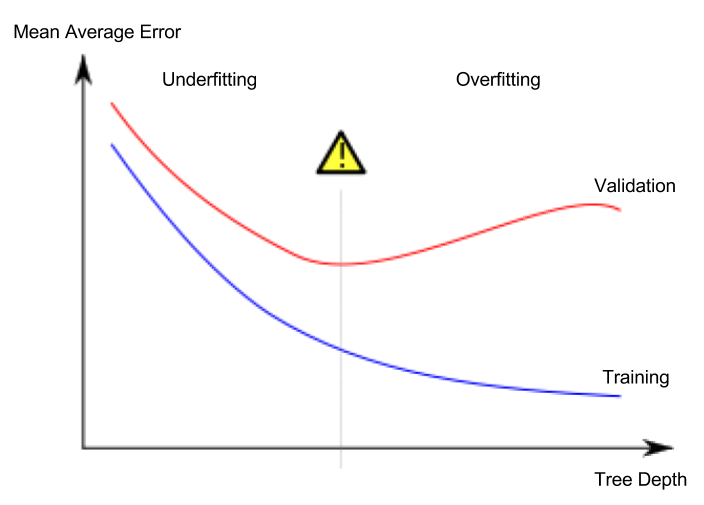

max_leaf_nodes argument provides a very sensible way to control overfitting vs underfitting. The more leaves we allow the model to make, the more we move from the underfitting area in the above graph to the overfitting area.

We can use a utility function to help compare MAE scores from different values for max_leaf_nodes:

In [1]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)


The data is loaded into train_X, val_X, train_y and val_y using the code we have discussed using train test split. Load the data below:

In [5]:
#TODO: Load the data after splitting it into train and test set.



In [3]:
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

NameError: name 'train_X' is not defined

### Exercise:

Repeat the similar exercise in iowa dataset and see how many number of leaves are optimal for your dataset. Once you know the optimal tree size, see what is the value of validation error for the model.